In [1]:
# Import Data Modules, Plotting Modules, and Stats/Regressions Packages# Import  
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import decomposition
from sklearn.decomposition import PCA
from matplotlib.mlab import PCA
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format ='retina'

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Armed Conflict Location and Event Dataset

In [2]:
# Upload the Africa ACLED Data Set
acled_africa = pd.read_csv('Africa_1997-2018_upd-Jul16.csv')

# Upload the Asia ACLED Data Set
acled_asia = pd.read_csv('Asia_2010-2018_upd-Jul17.csv')

# Upload the Middle East ACLED Data Set
acled_middleeast = pd.read_csv('MiddleEast_2016-2018_upd-Jul17.csv')

In [3]:
# Drop Columns from Africa Data Set
acled_africa.drop('EVENT_ID_CNTY', axis=1, inplace=True)

In [4]:
# Drop Columns from Asia Data Set
acled_asia.drop('EVENT_ID_CNTY', axis=1, inplace=True)
acled_asia.drop('EVENT_ID_NO_CNTY', axis=1, inplace=True)
acled_asia.drop('TIME_PRECISION', axis=1, inplace=True)
acled_asia.drop('YEAR', axis=1, inplace=True)
acled_asia.drop('ACTOR1', axis=1, inplace=True)
acled_asia.drop('ACTOR2', axis=1, inplace=True)
acled_asia.drop('INTER1', axis=1, inplace=True)
acled_asia.drop('INTER2', axis=1, inplace=True)
acled_asia.drop('INTERACTION', axis=1, inplace=True)
acled_asia.drop('ADMIN1', axis=1, inplace=True)
acled_asia.drop('ADMIN2', axis=1, inplace=True)
acled_asia.drop('ADMIN3', axis=1, inplace=True)
acled_asia.drop('SOURCE', axis=1, inplace=True)
acled_asia.drop('NOTES', axis=1, inplace=True)
acled_asia.drop('FATALITIES', axis=1, inplace=True)
acled_asia.drop('GEO_PRECISION', axis=1, inplace=True)

# Drop Columns from Africa Data Set
acled_africa.drop('EVENT_ID_CNTY', axis=1, inplace=True)
acled_africa.drop('EVENT_ID_NO_CNTY', axis=1, inplace=True)
acled_africa.drop('TIME_PRECISION', axis=1, inplace=True)
acled_africa.drop('YEAR', axis=1, inplace=True)
acled_africa.drop('ACTOR1', axis=1, inplace=True)
acled_africa.drop('ACTOR2', axis=1, inplace=True)
acled_africa.drop('INTER1', axis=1, inplace=True)
acled_africa.drop('INTER2', axis=1, inplace=True)
acled_africa.drop('INTERACTION', axis=1, inplace=True)
acled_africa.drop('ADMIN1', axis=1, inplace=True)
acled_africa.drop('ADMIN2', axis=1, inplace=True)
acled_africa.drop('ADMIN3', axis=1, inplace=True)
acled_africa.drop('SOURCE', axis=1, inplace=True)
acled_africa.drop('NOTES', axis=1, inplace=True)
acled_africa.drop('FATALITIES', axis=1, inplace=True)
acled_africa.drop('GEO_PRECISION', axis=1, inplace=True)

# Drop Columns from Middle East Data Set
acled_middleeast.drop('EVENT_ID_CNTY', axis=1, inplace=True)
acled_middleeast.drop('EVENT_ID_NO_CNTY', axis=1, inplace=True)
acled_middleeast.drop('TIME_PRECISION', axis=1, inplace=True)
acled_middleeast.drop('YEAR', axis=1, inplace=True)
acled_middleeast.drop('ACTOR1', axis=1, inplace=True)
acled_middleeast.drop('ACTOR2', axis=1, inplace=True)
acled_middleeast.drop('INTER1', axis=1, inplace=True)
acled_middleeast.drop('INTER2', axis=1, inplace=True)
acled_middleeast.drop('INTERACTION', axis=1, inplace=True)
acled_middleeast.drop('ADMIN1', axis=1, inplace=True)
acled_middleeast.drop('ADMIN2', axis=1, inplace=True)
acled_middleeast.drop('ADMIN3', axis=1, inplace=True)
acled_middleeast.drop('SOURCE', axis=1, inplace=True)
acled_middleeast.drop('NOTES', axis=1, inplace=True)
acled_middleeast.drop('FATALITIES', axis=1, inplace=True)
acled_middleeast.drop('GEO_PRECISION', axis=1, inplace=True)

ValueError: labels ['EVENT_ID_CNTY'] not contained in axis

In [5]:
# Rename Columns in Africa Data Set
acled_africa.rename(columns={'GWNO':'Gwno'}, inplace=True)
acled_africa.rename(columns={'EVENT_DATE':'EventDate'}, inplace=True)
acled_africa.rename(columns={'YEAR':'Year'}, inplace=True)
acled_africa.rename(columns={'EVENT_TYPE':'EventType'}, inplace=True)
acled_africa.rename(columns={'ACTOR1':'Actor1'}, inplace=True)
acled_africa.rename(columns={'ACTOR2':'Actor2'}, inplace=True)
acled_africa.rename(columns={'COUNTRY':'Country'}, inplace=True)
acled_africa.rename(columns={'LOCATION':'Location'}, inplace=True)
acled_africa.rename(columns={'LATITUDE':'Latitude'}, inplace=True)
acled_africa.rename(columns={'LONGITUDE':'Longitude'}, inplace=True)

# Rename Columns in Asia Data Set
acled_asia.rename(columns={'GWNO':'Gwno'}, inplace=True)
acled_asia.rename(columns={'EVENT_DATE':'EventDate'}, inplace=True)
acled_asia.rename(columns={'YEAR':'Year'}, inplace=True)
acled_asia.rename(columns={'EVENT_TYPE':'EventType'}, inplace=True)
acled_asia.rename(columns={'ACTOR1':'Actor1'}, inplace=True)
acled_asia.rename(columns={'ACTOR2':'Actor2'}, inplace=True)
acled_asia.rename(columns={'COUNTRY':'Country'}, inplace=True)
acled_asia.rename(columns={'LOCATION':'Location'}, inplace=True)
acled_asia.rename(columns={'LATITUDE':'Latitude'}, inplace=True)
acled_asia.rename(columns={'LONGITUDE':'Longitude'}, inplace=True)

# Rename Columns in Middle East Data Set
acled_middleeast.rename(columns={'GWNO':'Gwno'}, inplace=True)
acled_middleeast.rename(columns={'EVENT_DATE':'EventDate'}, inplace=True)
acled_middleeast.rename(columns={'YEAR':'Year'}, inplace=True)
acled_middleeast.rename(columns={'EVENT_TYPE':'EventType'}, inplace=True)
acled_middleeast.rename(columns={'ACTOR1':'Actor1'}, inplace=True)
acled_middleeast.rename(columns={'ACTOR2':'Actor2'}, inplace=True)
acled_middleeast.rename(columns={'COUNTRY':'Country'}, inplace=True)
acled_middleeast.rename(columns={'LOCATION':'Location'}, inplace=True)
acled_middleeast.rename(columns={'LATITUDE':'Latitude'}, inplace=True)
acled_middleeast.rename(columns={'LONGITUDE':'Longitude'}, inplace=True)

In [6]:
# Re-Order Africa Data Set
acled_africa=acled_africa[['EventType', 'EventDate', 'Country', 'Location', 'Latitude', 'Longitude']]

# Re-Order Asia Data Set
acled_asia=acled_asia[['EventType', 'EventDate', 'Country', 'Location', 'Latitude', 'Longitude']]

# Re-Order Middle East Data Set
acled_middleeast=acled_middleeast[['EventType', 'EventDate', 'Country', 'Location', 'Latitude', 'Longitude']]

In [7]:
# Shape of Africa Data Set
acled_africa.shape

(28074, 6)

In [8]:
# Shape of Asia Data Set
acled_asia.shape

(24373, 6)

In [9]:
# Shape of Middle East Data Set
acled_middleeast.shape

(26888, 6)

In [10]:
# Recode Event Type for Africa Data Set# Recode  
acled_africa.loc[acled_africa.EventType == 'Battle-No change of territory', 'EventType'] = 1
acled_africa.loc[acled_africa.EventType == 'Remote violence', 'EventType'] = 2
acled_africa.loc[acled_africa.EventType == 'Strategic development', 'EventType'] = 4
acled_africa.loc[acled_africa.EventType == 'Riots/Protests', 'EventType'] = 6
acled_africa.loc[acled_africa.EventType == 'Violence against civilians', 'EventType'] = 7

# Recode Event Type for Asia Data Set# Recode  
acled_asia.loc[acled_asia.EventType == 'Battle-No change of territory', 'EventType'] = 1
acled_asia.loc[acled_asia.EventType == 'Remote violence', 'EventType'] = 2
acled_asia.loc[acled_asia.EventType == 'Strategic development', 'EventType'] = 4
acled_asia.loc[acled_asia.EventType == 'Riots/Protests', 'EventType'] = 6
acled_asia.loc[acled_asia.EventType == 'Violence against civilians', 'EventType'] = 7

# Recode Event Type for Middle East Data Set#
acled_middleeast.loc[acled_middleeast.EventType == 'Battle-No change of territory', 'EventType'] = 1
acled_middleeast.loc[acled_middleeast.EventType == 'Remote violence', 'EventType'] = 2
acled_middleeast.loc[acled_middleeast.EventType == 'Strategic development', 'EventType'] = 4
acled_middleeast.loc[acled_middleeast.EventType == 'Riots/Protests', 'EventType'] = 6
acled_middleeast.loc[acled_middleeast.EventType == 'Violence against civilians', 'EventType'] = 7

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
# Concatenate Africa, Asia, and Middle East Data Sets
acled = [acled_asia, acled_africa, acled_middleeast]
acled = pd.concat(acled)

# Convert Date Column into Year, Month, and Day
acled['date'] = pd.to_datetime(acled['EventDate'])
acled['year'] = acled['date'].dt.year
acled['month'] = acled['date'].dt.month
acled['day'] = acled['date'].dt.day

# Recode Event Type for Data Set
acled.loc[acled.EventType == '1', 'EventType'] = 'Battle-No change of territory'
acled.loc[acled.EventType == '2', 'EventType'] = 'Remote violence'
acled.loc[acled.EventType == '4', 'EventType'] = 'Strategic development'
acled.loc[acled.EventType == '6', 'EventType'] = 'Riots/Protests'
acled.loc[acled.EventType == '7', 'EventType'] = 'Violence against civilians'

# Rename Country Names
acled.loc[acled.Country == 'Congo, Democratic Republic of (Zaire)', 'Country'] = 'Congo, DR'
acled.loc[acled.Country == 'Cote Dâ€™Ivoire', 'Country'] = 'Ivory Coast'

In [12]:
# Shape of Total ACLED Data Set
acled.shape

(79335, 10)

In [13]:
# Separate ACLED Data Set into Event Types
acled_eventtype_1 = acled[acled.EventType == 1]
acled_eventtype_2 = acled[acled.EventType == 2]
acled_eventtype_3 = acled[acled.EventType == 3]
acled_eventtype_4 = acled[acled.EventType == 4]
acled_eventtype_5 = acled[acled.EventType == 5]
acled_eventtype_6 = acled[acled.EventType == 6]
acled_eventtype_7 = acled[acled.EventType == 7]
acled_eventtype_8 = acled[acled.EventType == 8]

# Create dataframes for different Event Types by Year
acled_eventtype_1_year = acled_eventtype_1.groupby(['Country', 'year'])['EventType'].count().reset_index()
acled_eventtype_2_year = acled_eventtype_2.groupby(['Country', 'year'])['EventType'].count().reset_index()
acled_eventtype_3_year = acled_eventtype_3.groupby(['Country', 'year'])['EventType'].count().reset_index()
acled_eventtype_4_year = acled_eventtype_4.groupby(['Country', 'year'])['EventType'].count().reset_index()
acled_eventtype_5_year = acled_eventtype_5.groupby(['Country', 'year'])['EventType'].count().reset_index()
acled_eventtype_6_year = acled_eventtype_6.groupby(['Country', 'year'])['EventType'].count().reset_index()
acled_eventtype_7_year = acled_eventtype_7.groupby(['Country', 'year'])['EventType'].count().reset_index()
acled_eventtype_8_year = acled_eventtype_8.groupby(['Country', 'year'])['EventType'].count().reset_index()

# Rename Columns in Event Type dataframes
acled_eventtype_1_year.rename(columns={'EventType':'EventType1'}, inplace=True)
acled_eventtype_2_year.rename(columns={'EventType':'EventType2'}, inplace=True)
acled_eventtype_3_year.rename(columns={'EventType':'EventType3'}, inplace=True)
acled_eventtype_4_year.rename(columns={'EventType':'EventType4'}, inplace=True)
acled_eventtype_5_year.rename(columns={'EventType':'EventType5'}, inplace=True)
acled_eventtype_6_year.rename(columns={'EventType':'EventType6'}, inplace=True)
acled_eventtype_7_year.rename(columns={'EventType':'EventType7'}, inplace=True)
acled_eventtype_8_year.rename(columns={'EventType':'EventType8'}, inplace=True)

# Merge Event Type dataframes together
acled_eventtype_total = acled_eventtype_1_year.merge(acled_eventtype_2_year, on=['Country', 'year'], how='left')
acled_eventtype_total = acled_eventtype_total.merge(acled_eventtype_3_year, on=['Country', 'year'], how='left')
acled_eventtype_total = acled_eventtype_total.merge(acled_eventtype_4_year, on=['Country', 'year'], how='left')
acled_eventtype_total = acled_eventtype_total.merge(acled_eventtype_5_year, on=['Country', 'year'], how='left')
acled_eventtype_total = acled_eventtype_total.merge(acled_eventtype_6_year, on=['Country', 'year'], how='left')
acled_eventtype_total = acled_eventtype_total.merge(acled_eventtype_7_year, on=['Country', 'year'], how='left')
acled_eventtype_total = acled_eventtype_total.merge(acled_eventtype_8_year, on=['Country', 'year'], how='left')

In [14]:
# Replace NaN values with 0
acled_eventtype_total=acled_eventtype_total.fillna(0)

# Create a Column Summing up Total Events
acled_eventtype_total['TotalEvents'] = acled_eventtype_total['EventType1'] + acled_eventtype_total['EventType2'] + acled_eventtype_total['EventType3'] + acled_eventtype_total['EventType4'] + acled_eventtype_total['EventType5'] + acled_eventtype_total['EventType6'] + acled_eventtype_total['EventType7'] + acled_eventtype_total['EventType8']

# Create Dataframe for Total Events for each Country
acled_country = acled_eventtype_total.groupby(['Country'])['TotalEvents'].sum().reset_index()

# Create Dataframe for Total Events for each Year
acled_year = acled_eventtype_total.groupby(['year'])['TotalEvents'].sum().reset_index()

# Bar Graph for Armed Conflict Events per Country

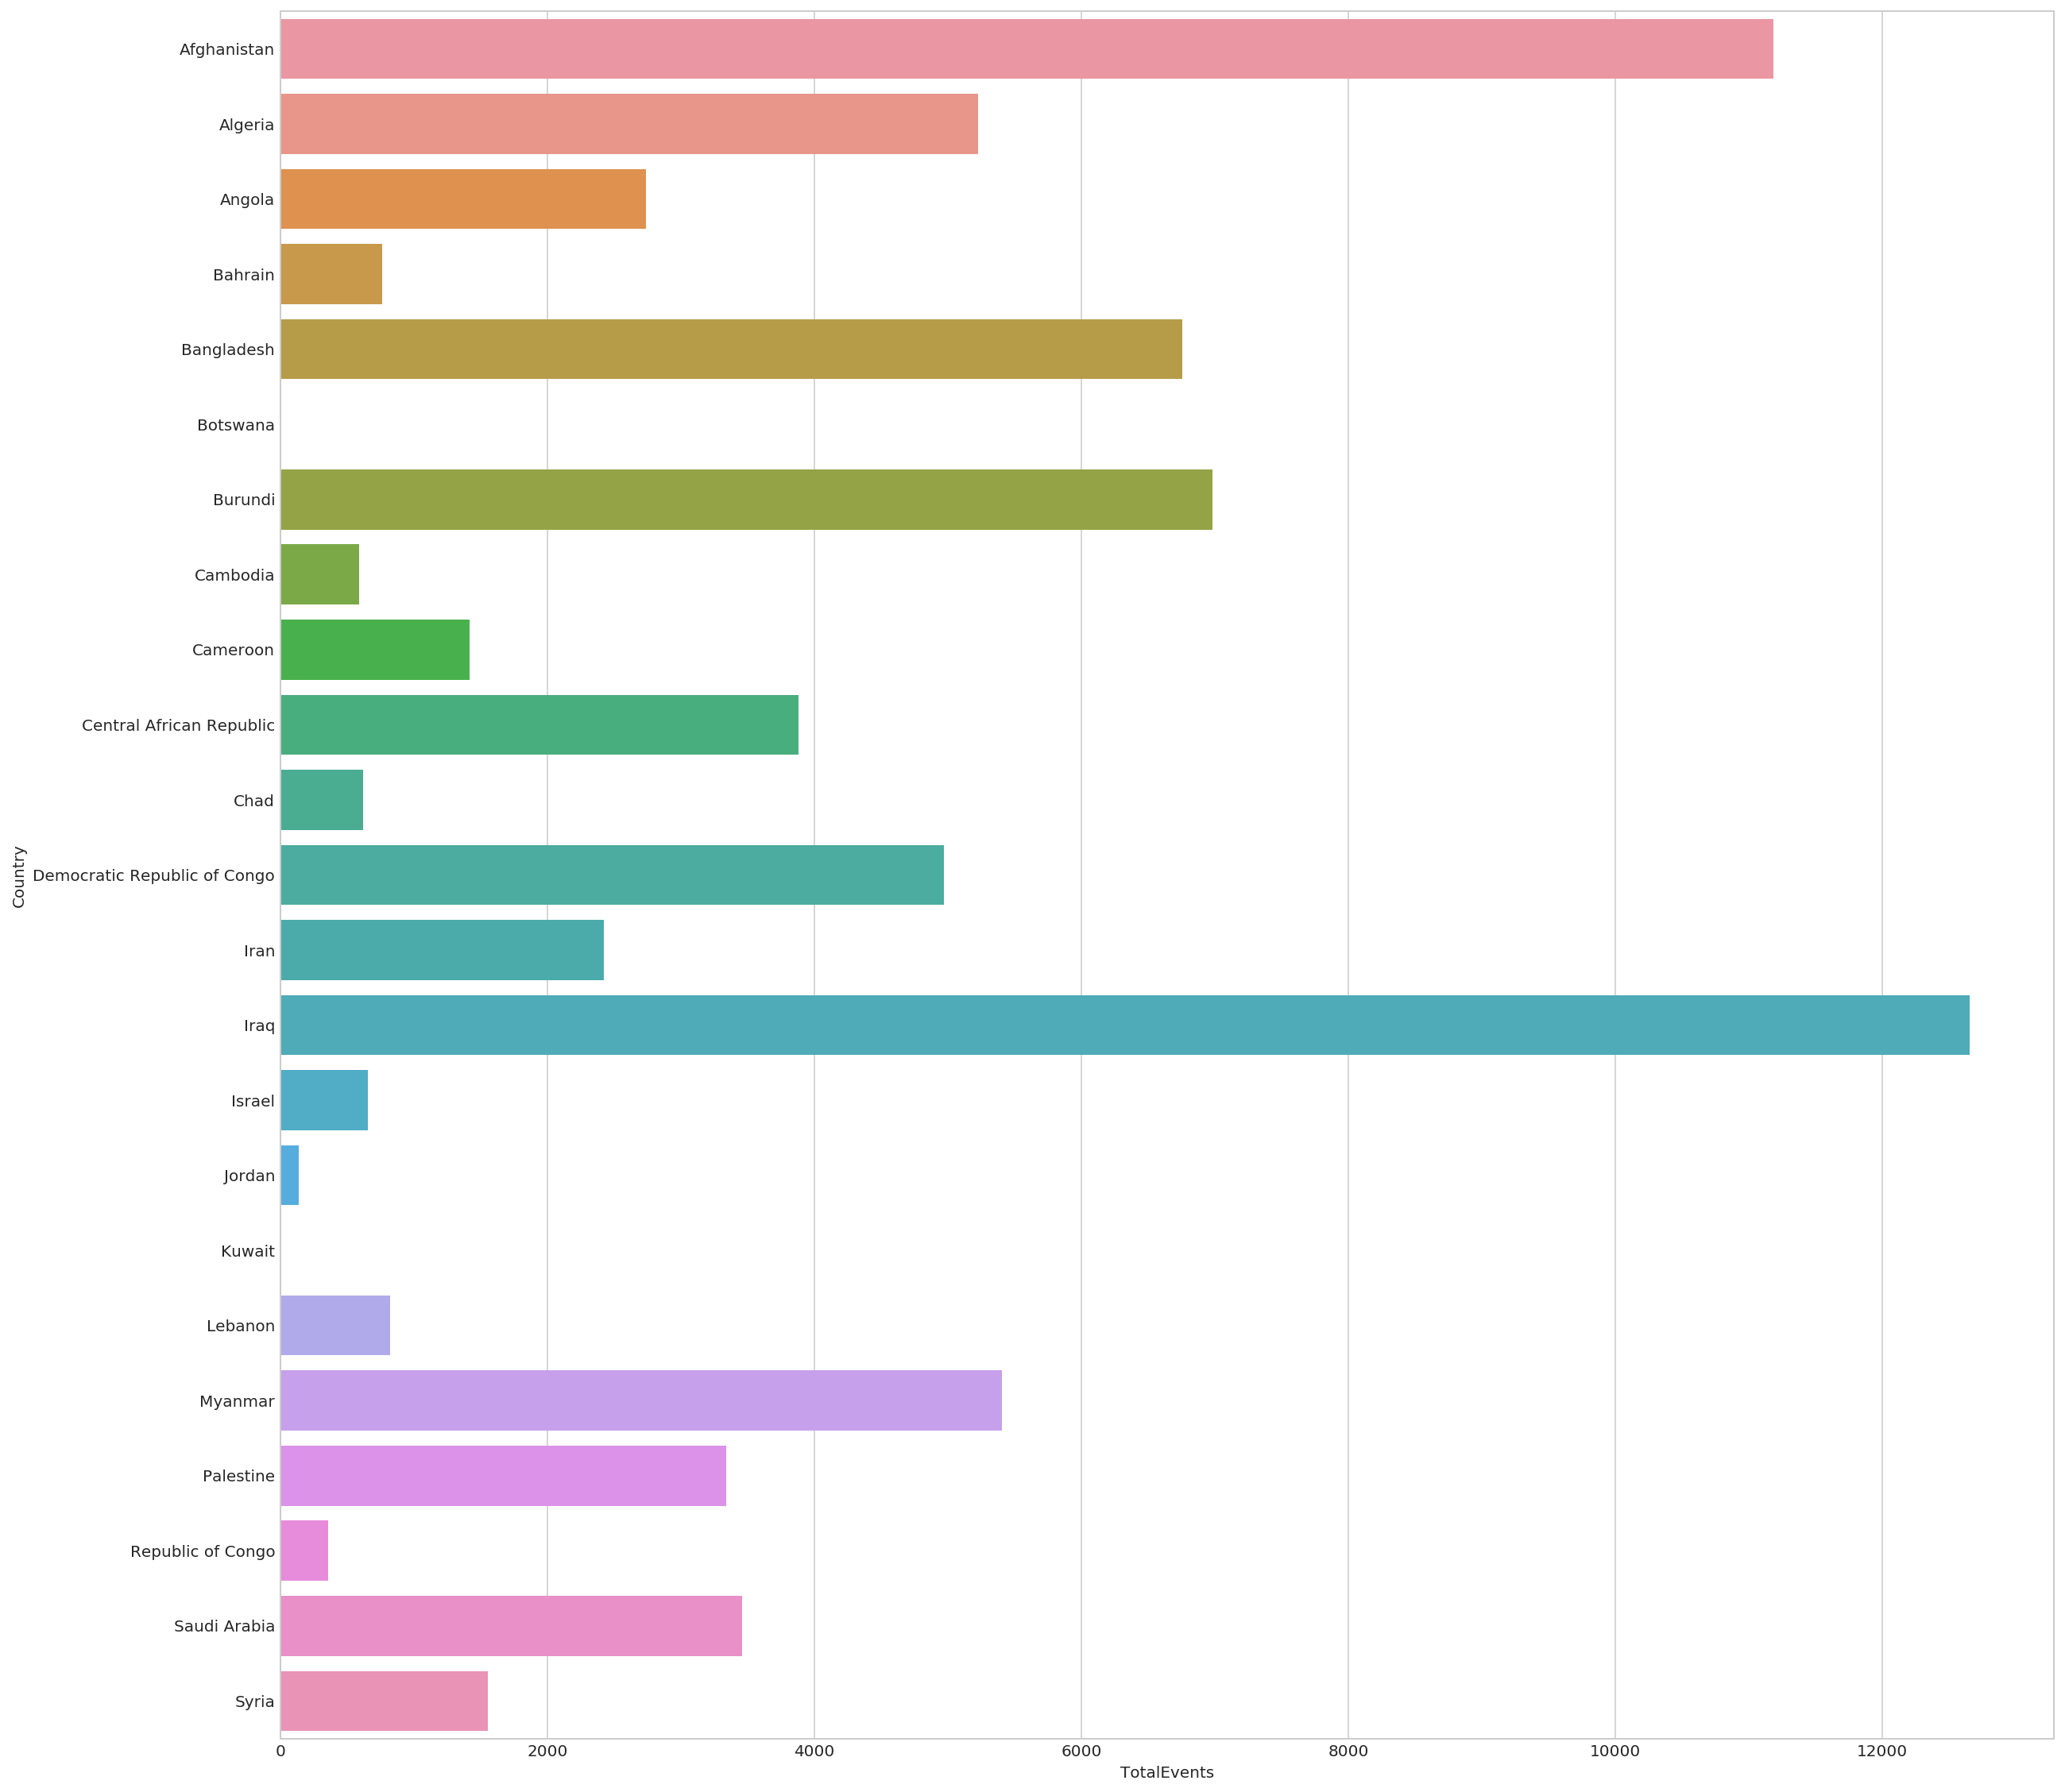

In [15]:
fig = plt.figure(figsize=(20,20))
ax =sns.barplot(x="TotalEvents", y="Country", data=acled_country)

The data shows that most armed conflict events have occurred in Syria, Pakistan, India, Yemen, Nigeria, and Somalia.

# Bar Graph for Armed Conflict Events per Year

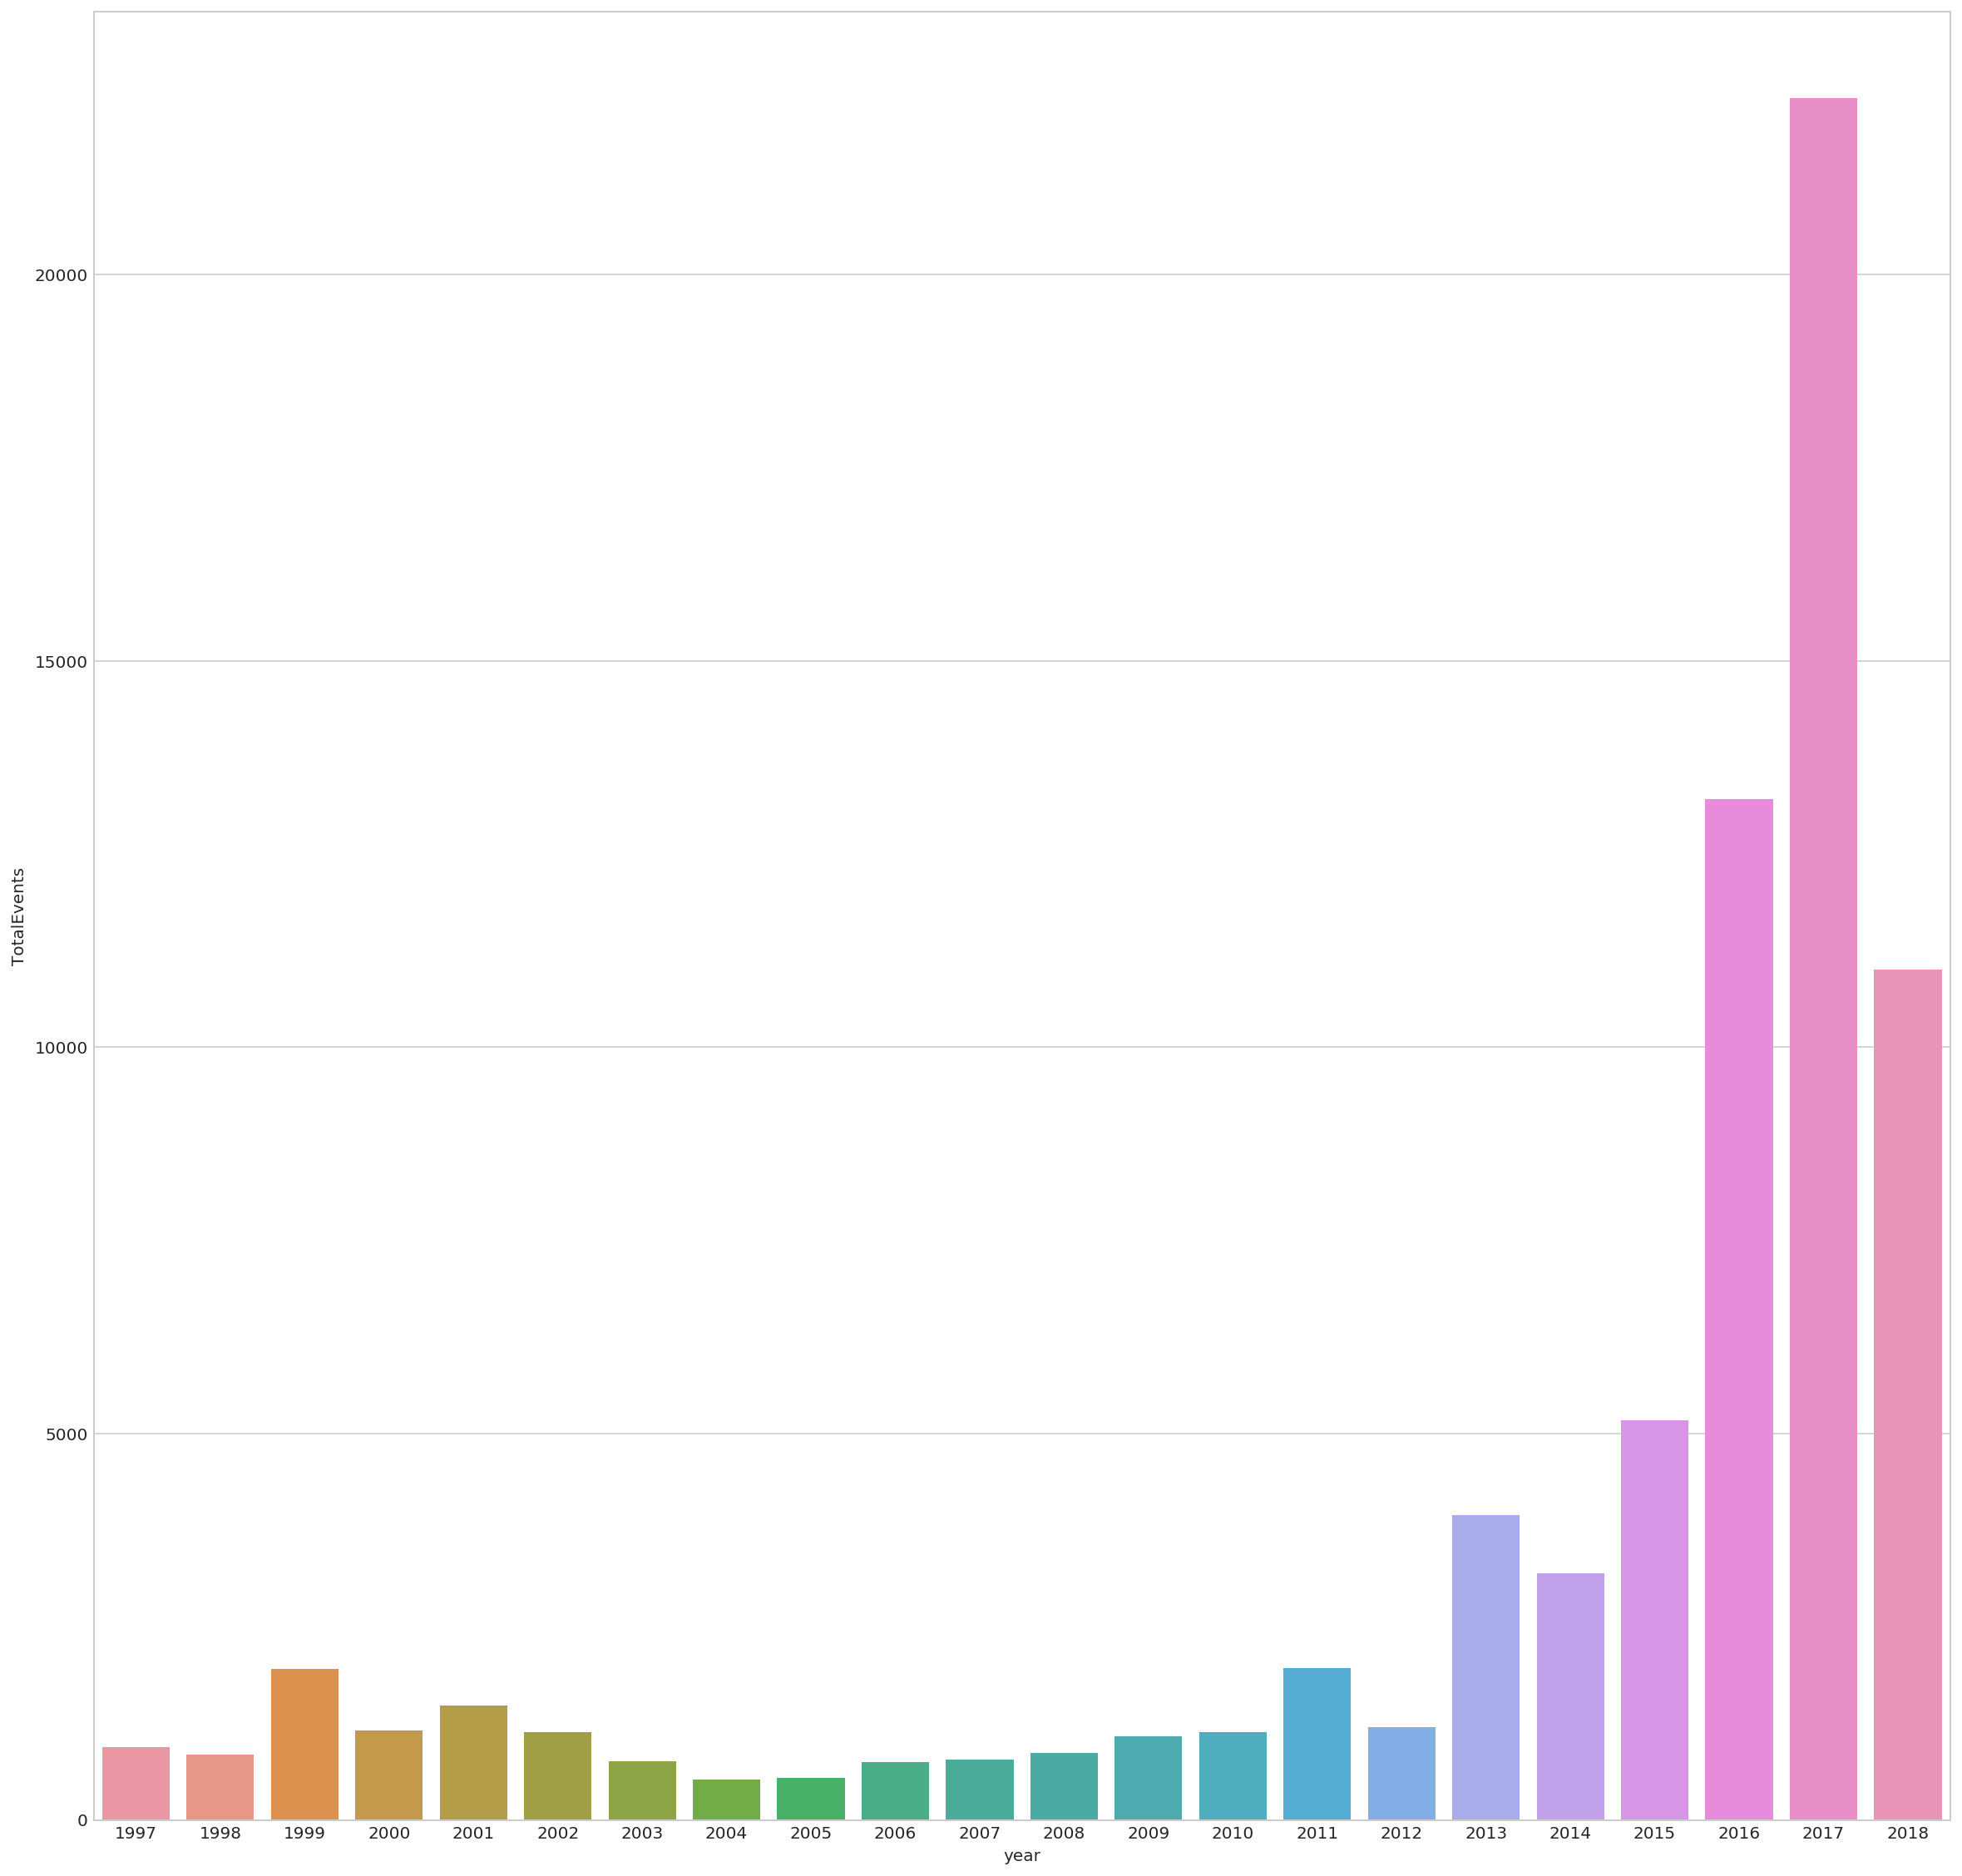

In [16]:
fig = plt.figure(figsize=(20,20))
ax =sns.barplot(x="year", y="TotalEvents", data=acled_year)

The data shows that the number of armed conflict events have been increasing at an accelerating rate since 2010 and have peaked in 2017.

# Table of Event Types by Country and Year

In [17]:
acled_eventtype_total.sort_values('TotalEvents', ascending=0).T

,0,157,158,1,45,47,159,199,71,179,...,185,81,132,192,190,187,32,52,80,51
Country,Afghanistan,Iraq,Iraq,Afghanistan,Bangladesh,Bangladesh,Iraq,Syria,Burundi,Palestine,...,Republic of Congo,Cameroon,Chad,Republic of Congo,Republic of Congo,Republic of Congo,Angola,Botswana,Cameroon,Botswana
year,2017,2016,2017,2018,2013,2015,2018,2017,2015,2017,...,2001,2003,2013,2013,2007,2003,2005,2010,1999,2009
EventType1,5086,1210,1427,2084,260,236,491,364,218,70,...,3,1,2,2,1,2,2,1,1,1
EventType2,2073,4151,2648,838,45,91,829,1083,6,64,...,1,0,0,0,0,0,0,0,0,0
EventType3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EventType4,289,314,319,144,48,41,130,25,230,207,...,0,0,1,0,0,0,0,1,0,0
EventType5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EventType6,134,102,54,173,1638,1005,129,15,411,907,...,0,1,1,1,1,0,1,0,1,1
EventType7,239,351,372,123,505,410,126,65,675,148,...,1,2,0,0,1,1,0,1,0,0
EventType8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The most armed conflict events are occurring in Syria in 2018 and 2017 of the event type Battle with No Change in Territory and Remote Violence, in India in 2017 and 2016 of the event type Rioting/Protesting, and in Yement in 2016 of event type Remote Violence. I plan to utilize this data set to observe features that are best predictors for different types of armed conflict events, the number of battle related deaths as the result of armed conflict, and the number of armed conflict events to have occurred.

# Indicator Dataframe 1: Poverty and Equity

In [18]:
# Upload Poverty and Equity Data Set
df1 = pd.read_csv('poverryandequity.csv')

The Poverty and Equity Data Set contains information on national population at different income levels for different countries.

In [19]:
# Rename Column Names
df1.rename(columns={'country':'Country'}, inplace=True)
df1.rename(columns={'Date':'year'}, inplace=True)
df1.rename(columns={'Value':'value'}, inplace=True)

# Drop Columns
df1.drop('Unit', axis=1, inplace=True)

# Rename Country Names
df1.loc[df1.Country == 'Congo, Dem. Rep.', 'Country'] = 'Congo, DR'
df1.loc[df1.Country == 'Congo, Rep.', 'Country'] = 'Congo'
df1.loc[df1.Country == "Cote d'Ivoire", 'Country'] = 'Ivory Coast'
df1.loc[df1.Country == 'Lao PDR', 'Country'] = 'Laos'

# Create Base Dataframe to Merge onto
merge_base = pd.DataFrame(df1, columns = ['Country', 'year'])

# Create List of Unique Values for Countries, Years, and Indicators
indicators = df1.indicator.unique()
years = df1.year.unique()
countries = df1.Country.unique()

# Create Dataframes for each Indicator, Rename Columns, and Merge onto Base Dataframe
for i in indicators:
    df1_i = df1[df1.indicator == i]
    df1_i.rename(columns={'value':i}, inplace=True)
    merge_base = pd.merge(merge_base, df1_i, on=['Country', 'year'], how='left')

# Drop Duplicate Columns
merge_base.drop('indicator_x', axis=1, inplace=True)
merge_base.drop('indicator_y', axis=1, inplace=True)

# Rename Base Dataframe
df1_indicators = merge_base

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [20]:
# Shape of Indicator Data Set# Shape o 
df1_indicators.shape

(5492, 60)

# Indicator Dataframe 2: Index of Economic Freedom

In [24]:
# Upload Index of Economic Freedom Data Set
df2 = pd.read_csv('indexofeconomicfreedom.csv')

The Index of Economic Freedom Data Set contains information on the assessment of institutional capabilities in providing and protecting economic freedom in different countries

In [25]:
# Rename Column Names
df2.rename(columns={'country':'Country'}, inplace=True)
df2.rename(columns={'Date':'year'}, inplace=True)
df2.rename(columns={'Value':'value'}, inplace=True)

# Drop Columns
df2.drop('Unit', axis=1, inplace=True)

# Rename Country Names
df2.loc[df2.Country == 'Democratic Republic of Congo', 'Country'] = 'Congo, DR'
df2.loc[df2.Country == 'Republic of Congo', 'Country'] = 'Congo'
df2.loc[df2.Country == "CÃ´te d'Ivoire", 'Country'] = 'Ivory Coast'

# Create Base Dataframe to Merge onto
merge_base = pd.DataFrame(df2, columns = ['Country', 'year'])

# Create List of Unique Values for Countries, Years, and Indicators
indicators = df2.indicator.unique()
years = df2.year.unique()
countries = df2.Country.unique()

# Create Dataframes for each Indicator, Rename Columns, and Merge onto Base Dataframe
for i in indicators:
    df2_i = df2[df2.indicator == i]
    df2_i.rename(columns={'value':i}, inplace=True)
    merge_base = pd.merge(merge_base, df2_i, on=['Country', 'year'], how='left')

# Drop Duplicate Columns
merge_base.drop('indicator', axis=1, inplace=True)
merge_base.drop('indicator_x', axis=1, inplace=True)
merge_base.drop('indicator_y', axis=1, inplace=True)

# Rename Base Dataframe
df2_indicators = merge_base

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [26]:
# Shape of Indicator Data Set
df2_indicators.shape

(40047, 15)

# Total Data Set

In [27]:
# Merge Indicator Data Sets with ACLED Event Type Data Set
data = pd.merge(acled_eventtype_total, df1_indicators, on=['Country', 'year'])

In [29]:
data = data.reset_index()

In [39]:
data['index'] = data['index'].astype('float')
data['year'] = data['year'].astype('float')
data['EventType1'] = data['EventType1'].astype('float')
data.dtypes

index                                                                                                              float64
Country                                                                                                             object
year                                                                                                               float64
EventType1                                                                                                         float64
EventType2                                                                                                         float64
EventType3                                                                                                         float64
EventType4                                                                                                         float64
EventType5                                                                                                         float64
EventType6      

In [35]:
data.dtypes

index                                                                                                                int64
Country                                                                                                             object
year                                                                                                                 int64
EventType1                                                                                                           int64
EventType2                                                                                                         float64
EventType3                                                                                                         float64
EventType4                                                                                                         float64
EventType5                                                                                                         float64
EventType6      